In [1]:
import io
import collections
from operator import itemgetter

import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
import jieba

sns.set(color_codes=True)

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d  %H:%M:%S')
df = pd.read_csv("~/Wechat/record.csv",encoding='utf-8', parse_dates=['日期'], date_parser=dateparse)

df = df[df["消息内容"].notnull()]

total_count = collections.Counter(df["对话分组名"])
print(total_count)

df_dict = {}
for k, v in sorted(total_count.items(), key=itemgetter(1),reverse=True)[:2]:
	df_temp = df[df["对话分组名"] == k]
	df_dict[k] = df_temp

Counter({'好好': 3029, '六子': 2851, '未知好友': 48})


In [47]:
def count_word(df, suffix, show=20):
	word_list = []
	for i,text in enumerate(df["消息内容"]):
		seg_list  = jieba.lcut(text, cut_all=True)
		word_list.extend(seg_list)

	for s in word_list:
		if len(s) > 20:
			word_list.remove(s)
	word_count = collections.Counter(word_list)

	fp = io.open("./result_{:s}.txt".format(suffix),"w", encoding="utf-8")
	for i,(k, v) in enumerate(sorted(word_count.items(), key=itemgetter(1),reverse=True)):
		if i < show and k:
# 			print(type(k),len(k),not k,k.encode('utf-8'))
			print(i,k,v)
		fp.write(k+": "+str(v)+"\n")
	fp.close()

	return word_count

In [48]:
word_count_all = count_word(df,"all",50) # show first 50 phrases

1 我 911
2 的 756
3 你 717
4 了 603
5 app 277
6 恢复 276
7 Contents 275
8 苹果 275
9 1511142866 275
10 Backup 275
11 MacOS 275
12 大师 275
13 Applications 275
14 好 262
15 是 252
16 哈哈 242
17 吧 226
18 就 214
19 做 214
20 啊 212
21 要 179
22 吗 178
23 脸 176
24 捂 174
25 可以 171
26 哈哈哈 154
27 在 147
28 去 145
29 都 138
30 不 137
31 我们 131
32 也 129
33 那 121
34 说 120
35 有 113
36 CDATA 108
37 那个 105
38 微笑 103
39 不是 101
40 还 101
41 他 101
42 想 96
43 T 96
44 一个 94
45 和 93
46 一下 92
47 Attachment 92
48 m6 92
49 folders 92


In [49]:
for k,v in df_dict.items():
	print(k+": ")
	count_word(v,k,20) # show first 20 phrases for each user

六子: 
1 我 475
2 你 327
3 的 319
4 了 275
5 好 139
6 app 135
7 恢复 134
8 Contents 133
9 大师 133
10 苹果 133
11 1511142866 133
12 Backup 133
13 MacOS 133
14 Applications 133
15 是 104
16 就 100
17 要 99
18 哈哈 95
19 吧 95
好好: 
1 我 436
2 的 432
3 你 354
4 了 282
5 是 148
6 哈哈 147
7 Contents 142
8 app 142
9 大师 142
10 恢复 142
11 苹果 142
12 1511142866 142
13 Backup 142
14 MacOS 142
15 Applications 142
16 吧 131
17 脸 122
18 啊 121
19 做 121


In [52]:
key_phrase = "包装" # set key phrase here

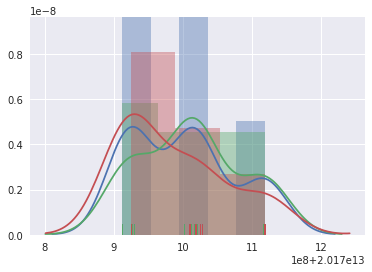

In [53]:
%matplotlib inline
df_hist = df[df["消息内容"].str.contains(key_phrase)]
dates = list(df_hist["日期"])
date_list = []
for d in dates:
	date_list.append(int(d.strftime("%Y%m%d%H%M%S")))
sns.distplot(date_list, rug=True,label="all")

for i,(k,v) in enumerate(df_dict.items()):
	df_hist = v[v["消息内容"].str.contains(key_phrase)]
	dates = list(df_hist["日期"])
	date_list = []
	for d in dates:
		date_list.append(int(d.strftime("%Y%m%d%H%M%S")))
	sns.distplot(date_list, rug=True,label=str(i))
